In [1]:
%reload_ext rpy2.ipython
%R data <- read.csv('~/Downloads/metrics.csv')

,X,time,host,obj,variable,value,scope
1,0,1673646000,c0m1-i-0b25d7ecf8841a3bd.longevity-i-c11.stg.s...,Hostwide,avg.cpu.pct,1.795000,01 system
2,1,1673646000,sh-i-0349666124d0fbf48.longevity-i-c11.stg.spl...,Hostwide,avg.cpu.pct,0.968095,01 system
3,2,1673646000,sh-i-077e77085919abdf1.longevity-i-c11.stg.spl...,Hostwide,avg.cpu.pct,0.920714,01 system
4,3,1673646000,sh-i-0d44179dc9171c6d4.longevity-i-c11.stg.spl...,Hostwide,avg.cpu.pct,0.943929,01 system
5,4,1673646300,idx-i-00dddd1bdbdade1bd.longevity-i-c11.stg.sp...,Hostwide,avg.cpu.pct,6.348846,01 system
...,...,...,...,...,...,...,...
291255,130,1673659800,idx-i-09d8732848779f804.longevity-i-c11.stg.sp...,local_bucket_upload,throughput.KB,14916.000000,06 buckets_tx
291256,131,1673659800,idx-i-0b0a31d02aaf82a82.longevity-i-c11.stg.sp...,local_bucket_upload,throughput.KB,36716.000000,06 buckets_tx
291257,132,1673659800,idx-i-0d6d390dc19728725.longevity-i-c11.stg.sp...,local_bucket_upload,throughput.KB,1316.000000,06 buckets_tx
291258,133,1673660100,idx-i-0392fdaf6a9a0ae52.longevity-i-c11.stg.sp...,local_bucket_upload,throughput.KB,10340.000000,06 buckets_tx


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


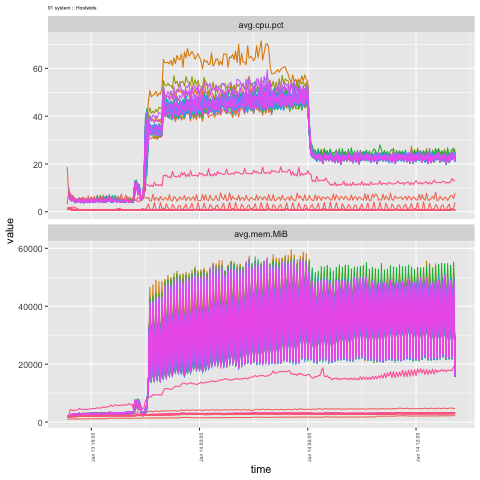

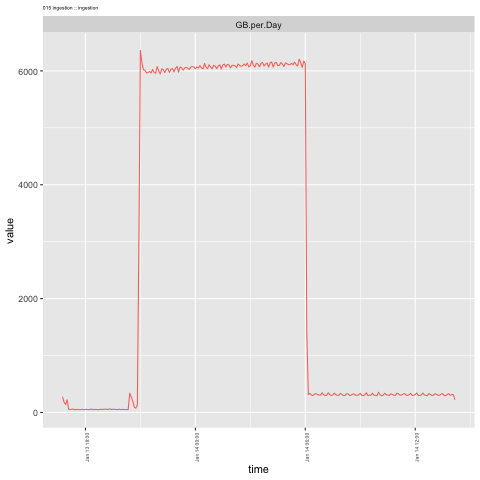

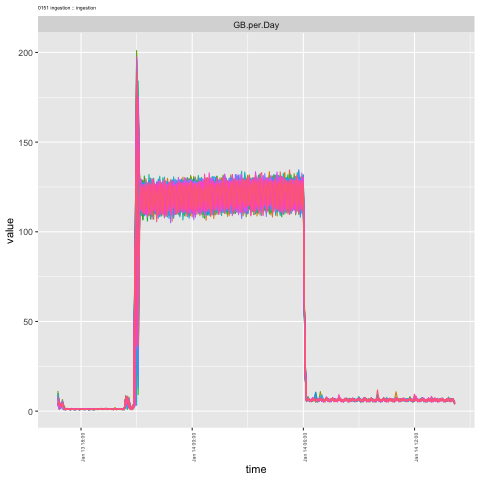

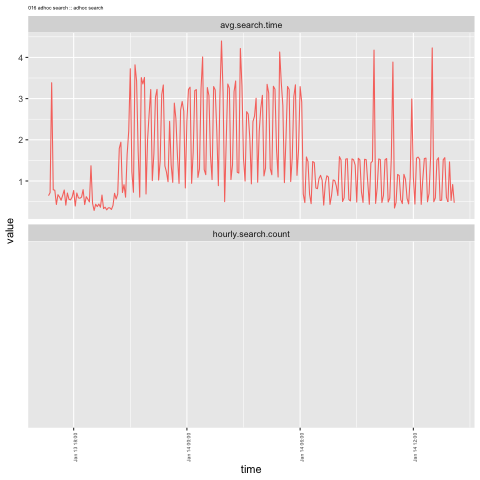

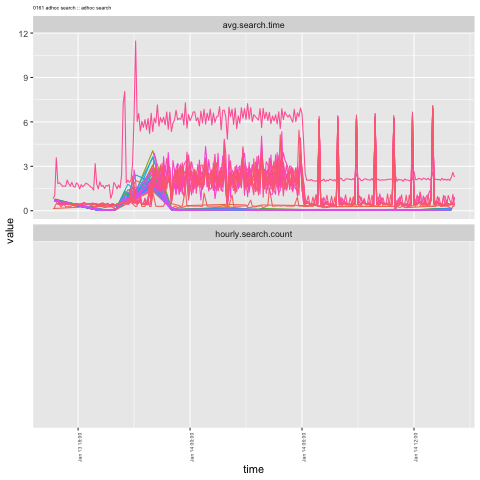

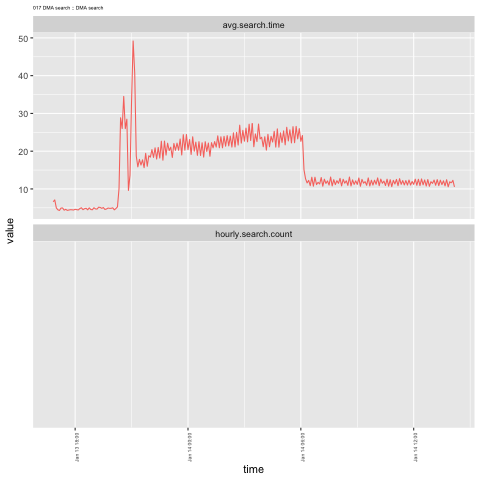

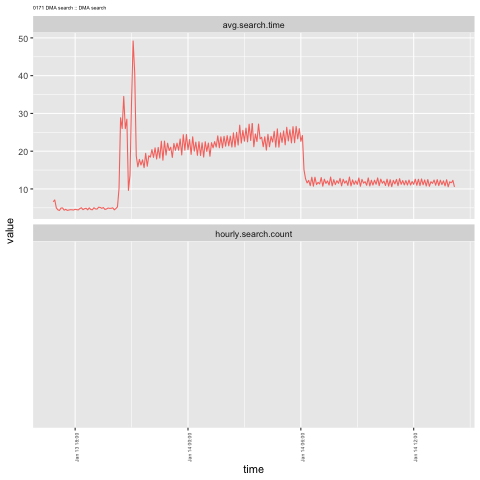

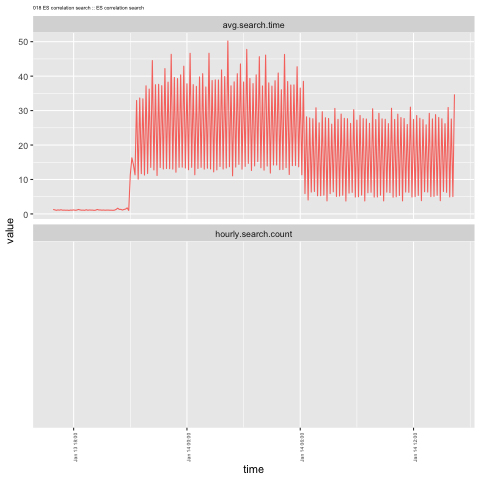

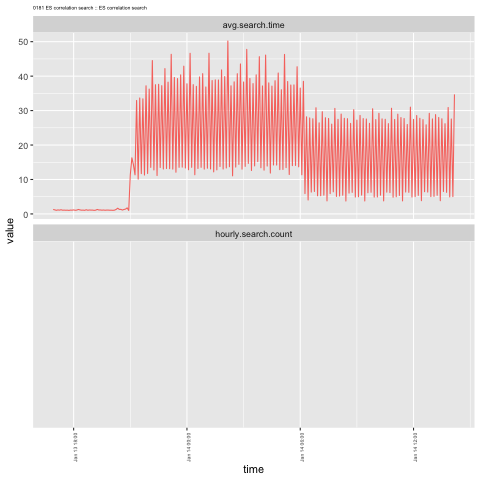

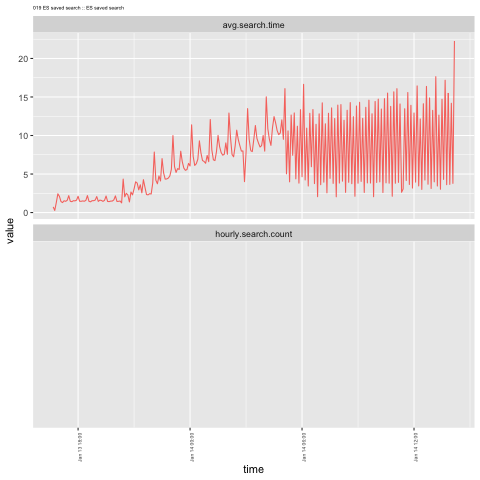

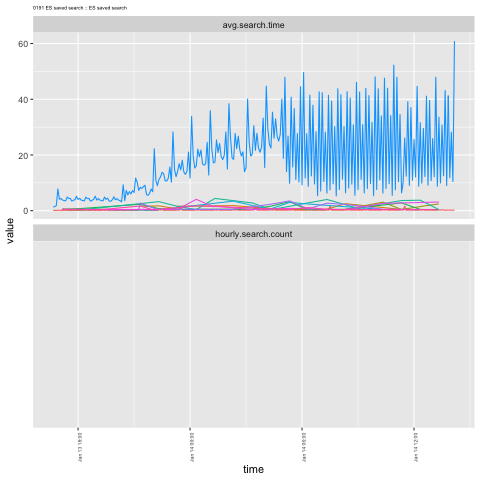

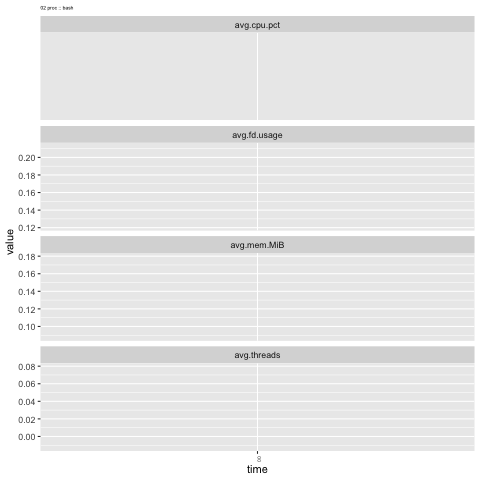

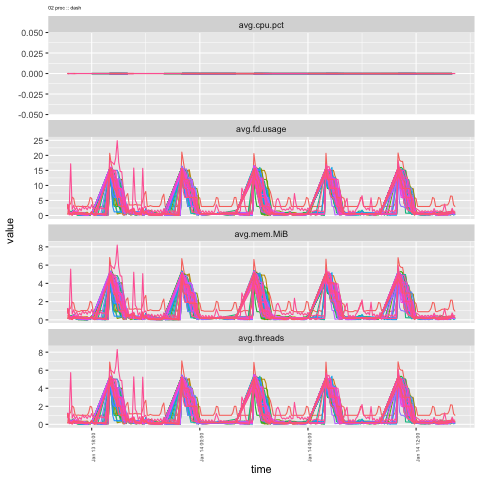

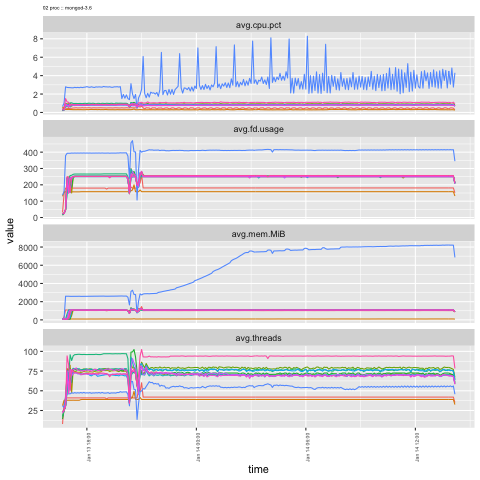

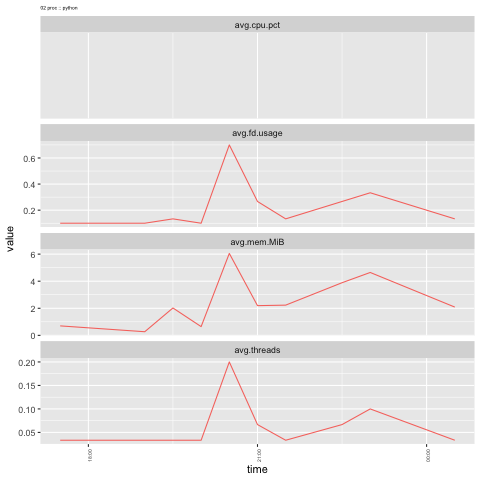

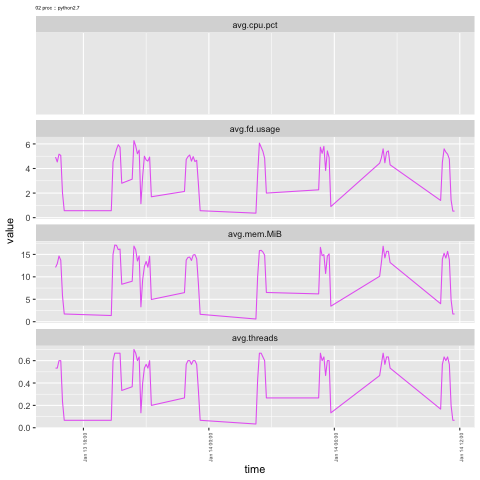

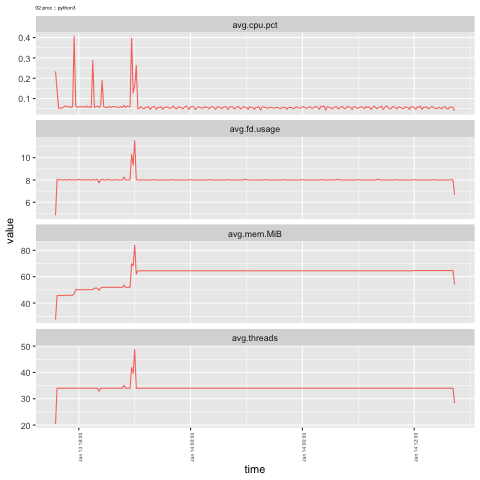

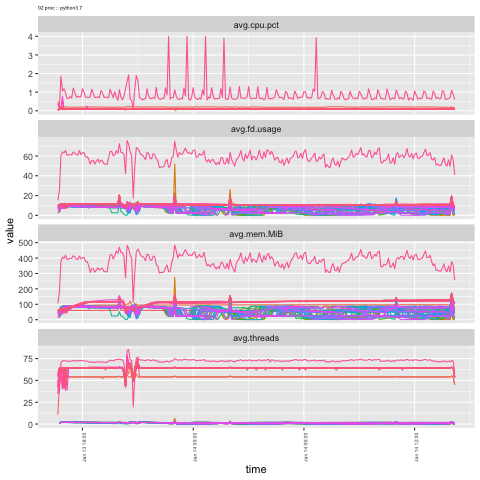

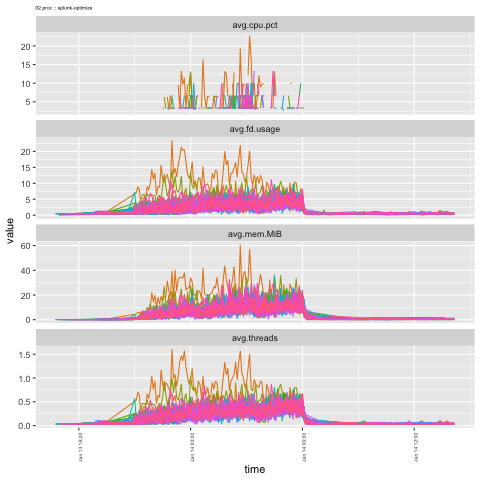

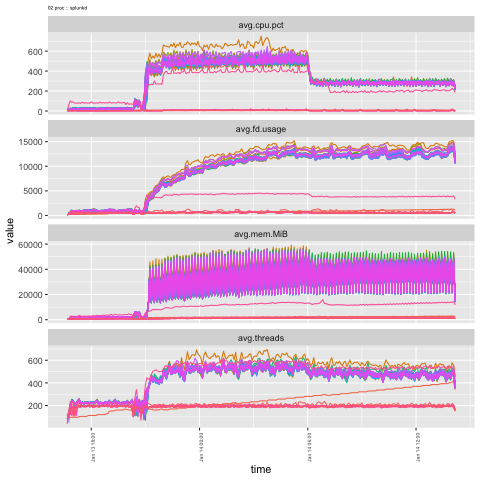

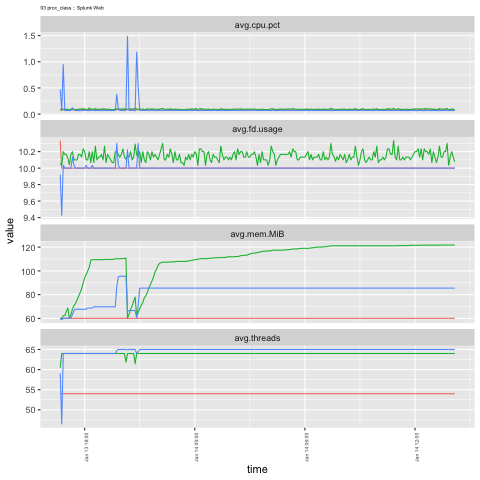

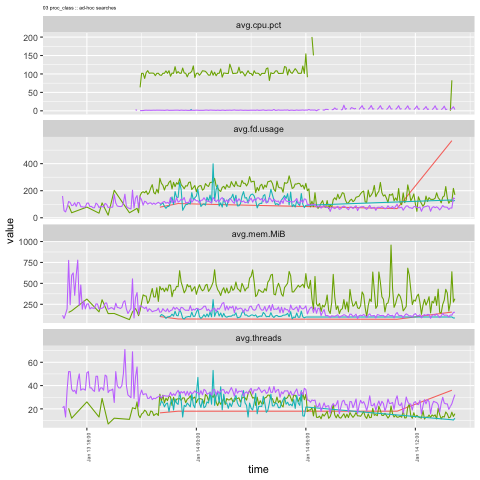

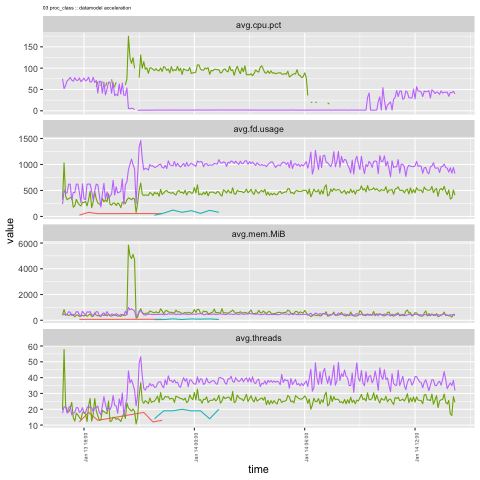

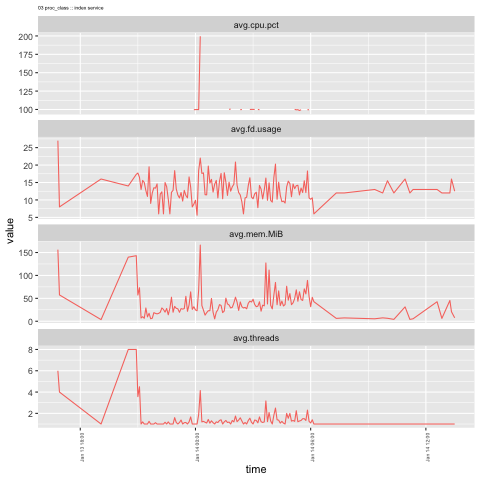

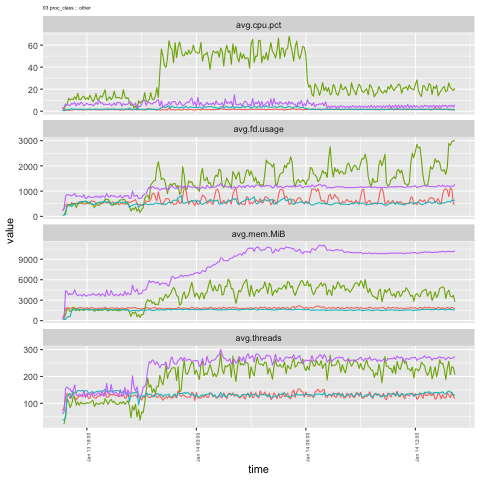

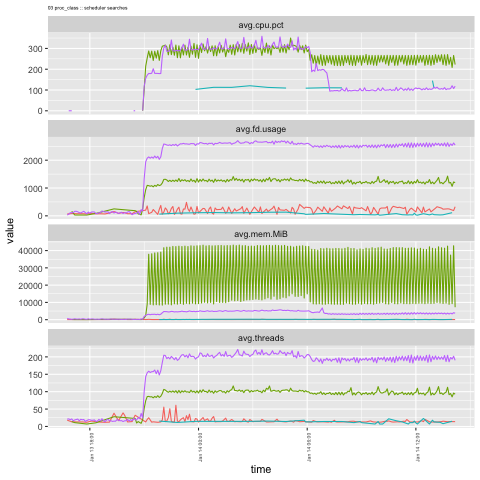

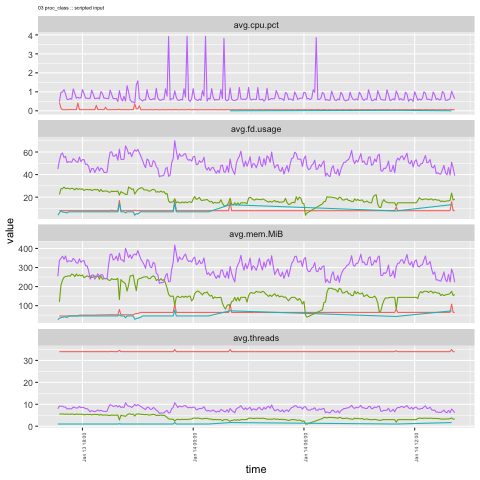

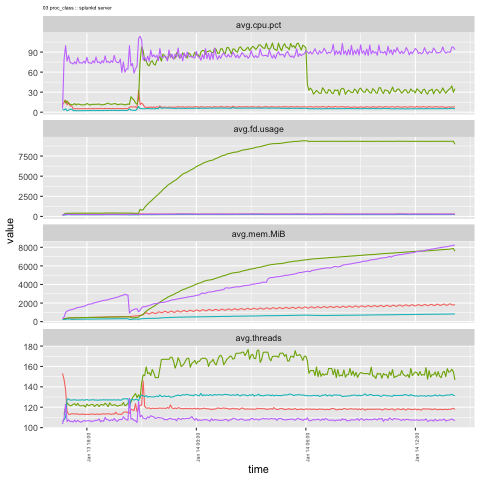

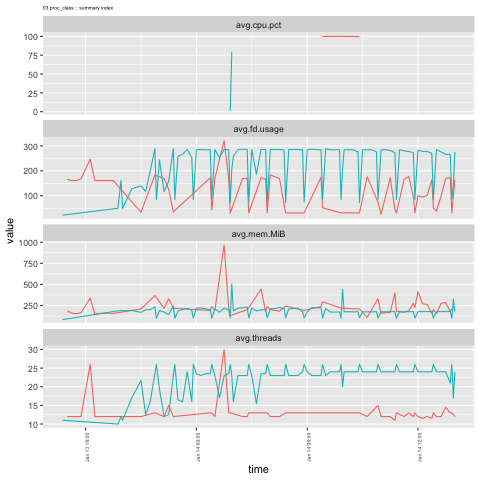

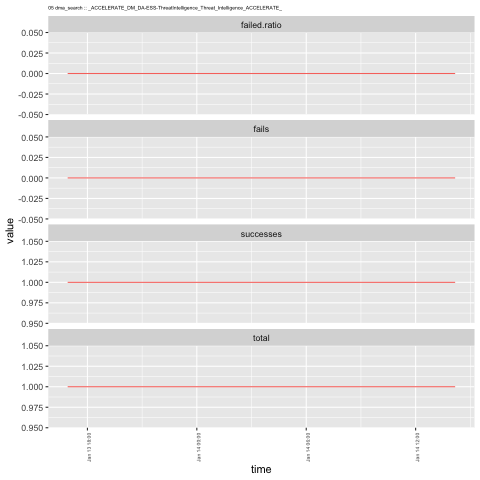

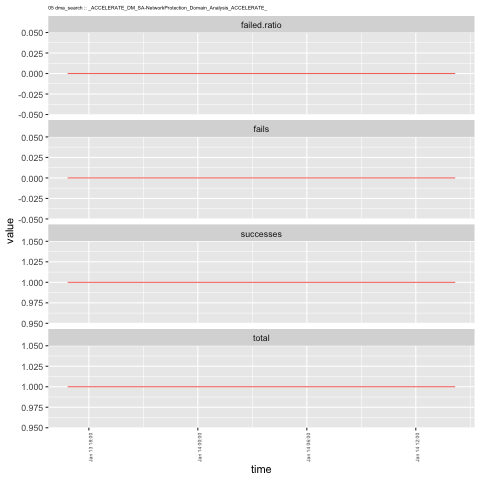

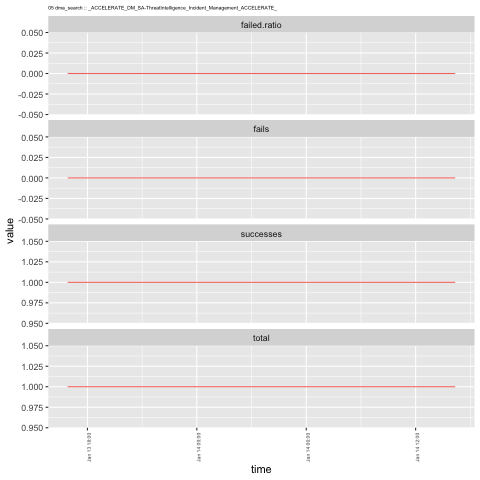

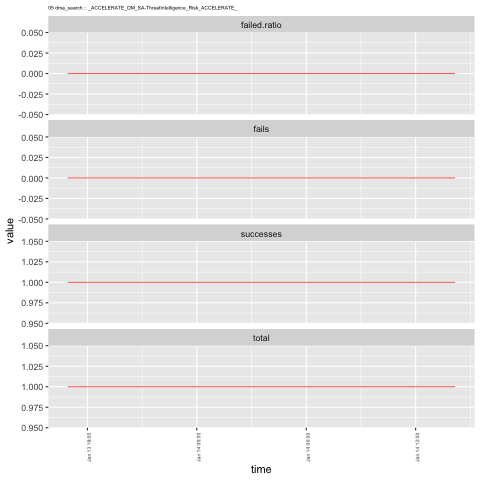

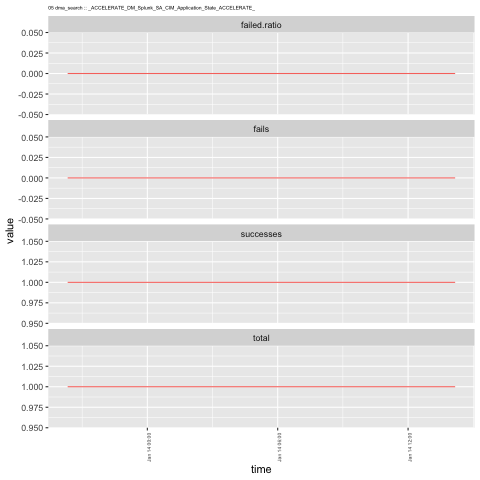

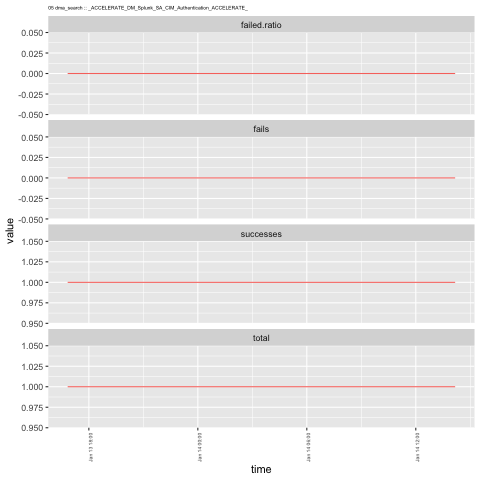

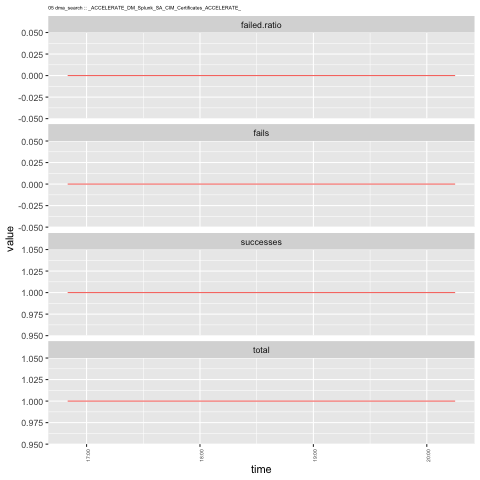

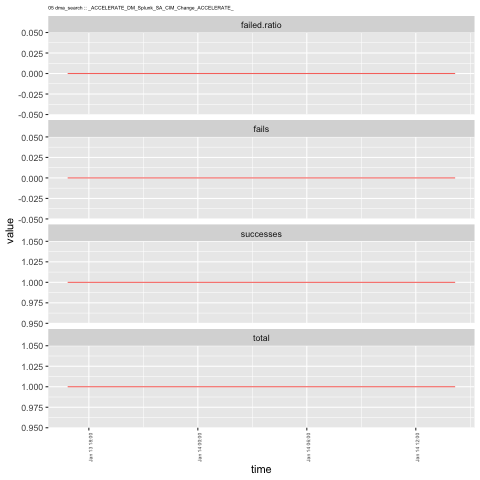

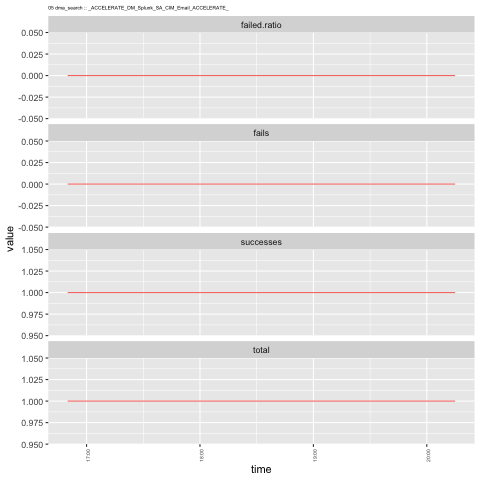

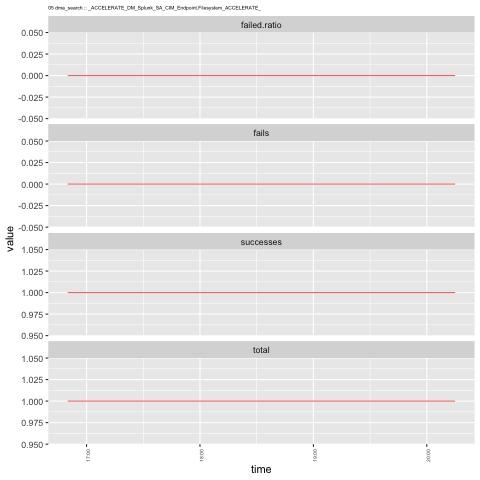

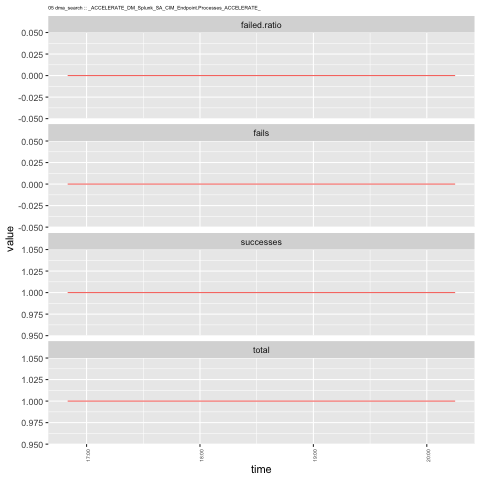

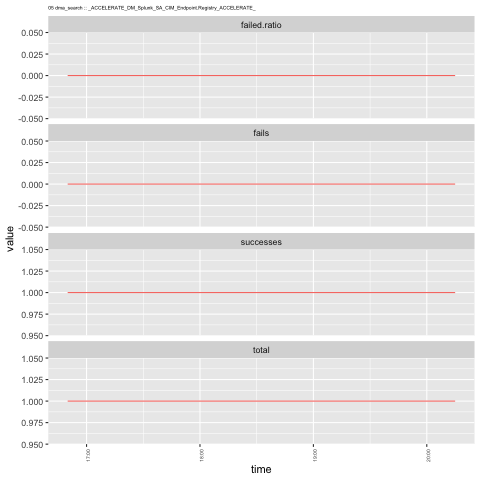

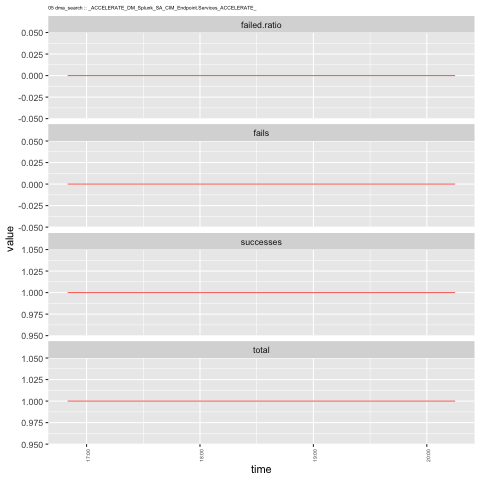

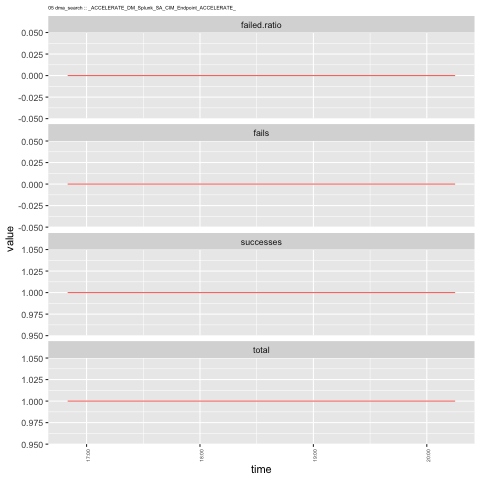

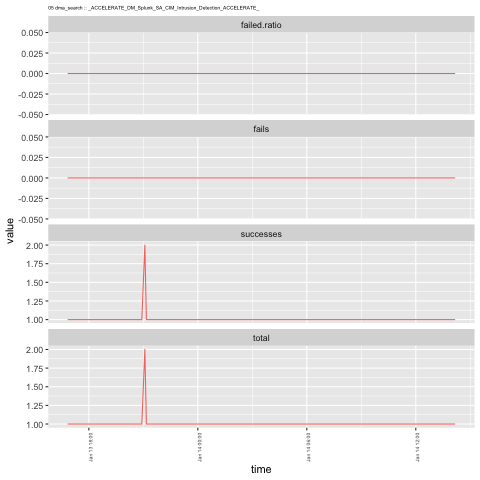

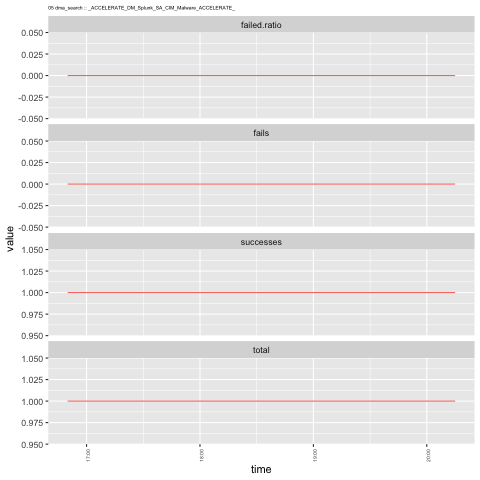

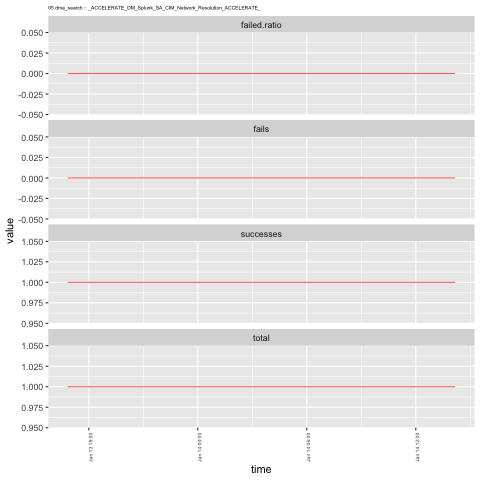

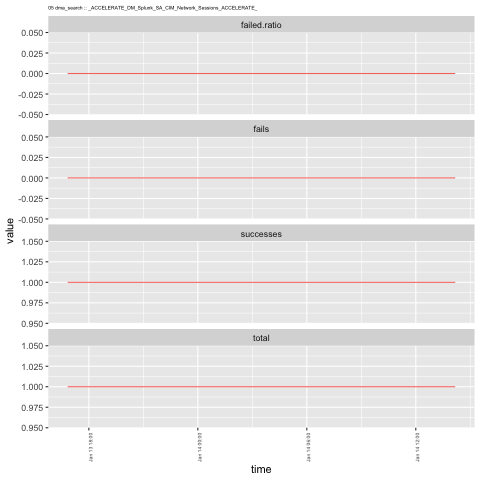

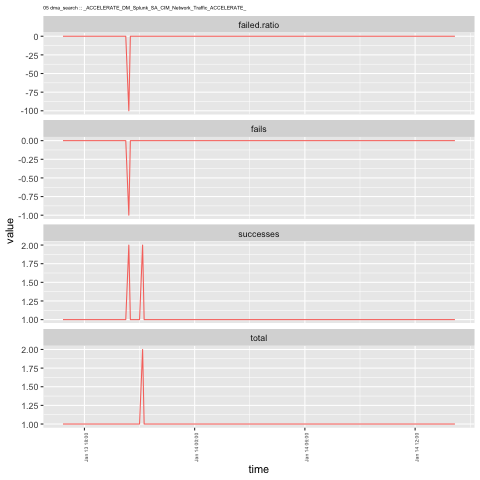

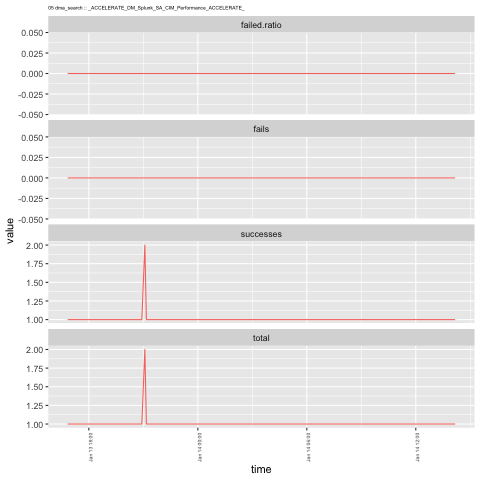

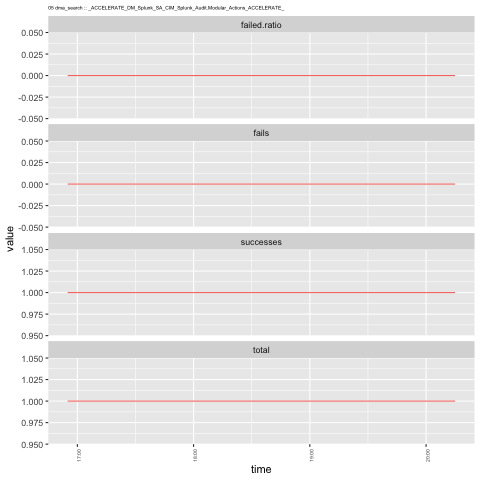

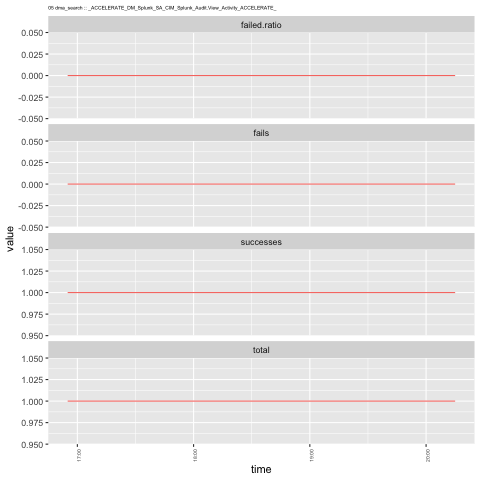

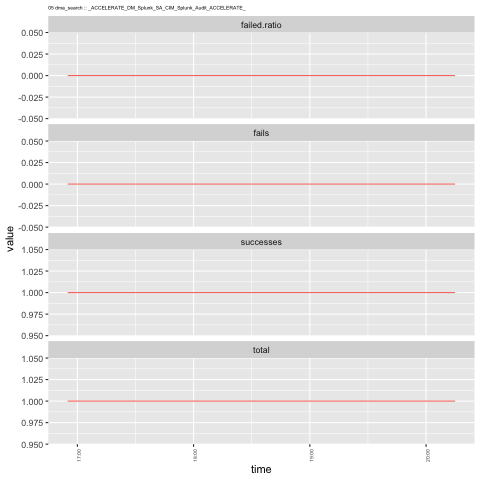

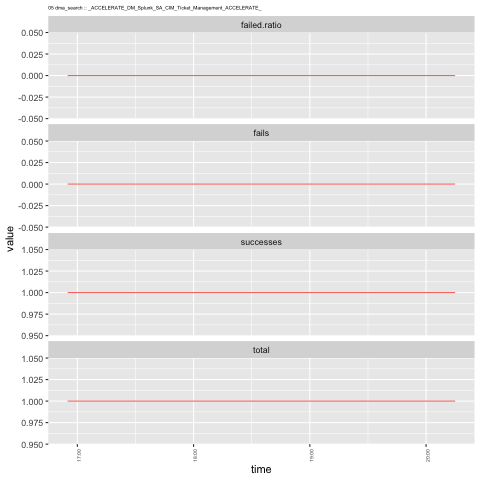

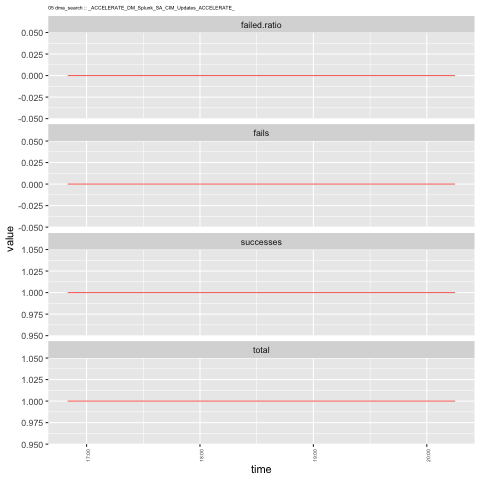

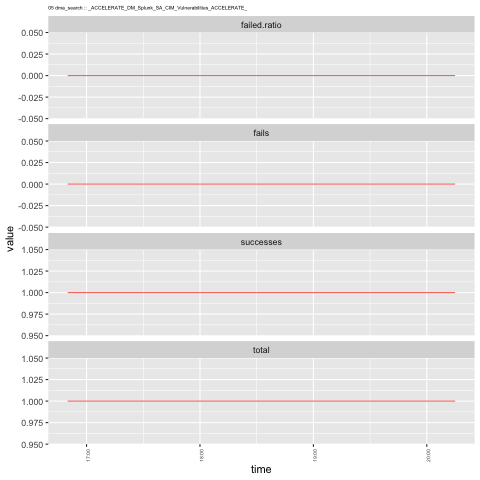

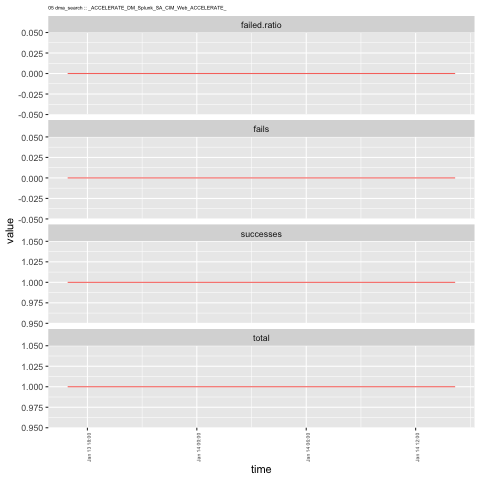

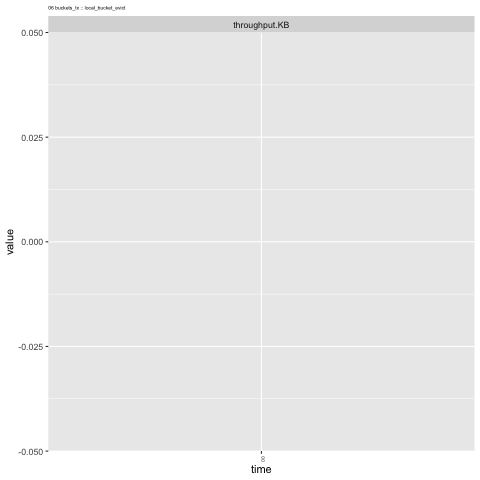

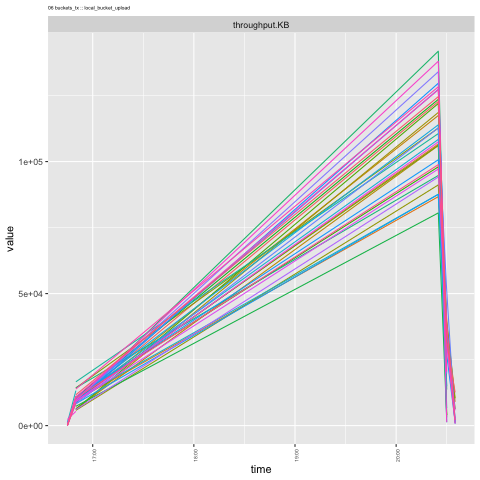

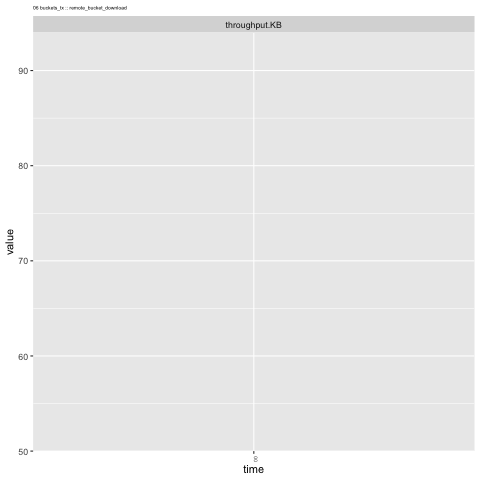

In [3]:
%%R
library('ggplot2')
library('plyr')

data$time <- as.POSIXct(data$time, origin="1970-01-01")

#write.csv(r_df, paste0('/Users/yhirasawa/Desktop/',outfilename,'.csv'))
#pdf(paste0('/Users/yhirasawa/Desktop/metrics_cloud.pdf'))
d_ply(
    data,
    .(scope,obj),
    function (d){
        p <- ggplot(d) + aes(time, value, color=host, group=host) +
        #geom_point() +
        geom_line() +
        facet_wrap(~variable, ncol=1, scale='free_y') +
        ggtitle(paste(d$scope[1],"::", d$obj[1])) +
        theme(    
            legend.position = "none", legend.text=element_text(size=3),
            axis.text.x = element_text(size = 5, angle=90, hjust=1),
            plot.title = element_text(size=5)
        ) 
        print(p)
    }
)
#dev.off()